<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [148]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [149]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [150]:
data = pd.read_csv('train.csv')

In [151]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [152]:
# Посмотрим, как выглядит наш датасет
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [153]:
'''
Посмотрим основную информацию о нашем датасете с помощью метода info. Он выводит информацию, включающую в себя
тип данных в столбце, кол-во ненулевых элементов и сколько памяти занимает датафрейм (это нас не интересует, поэтому ставим 
memory_usage=False).
'''
data.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [154]:
# Посмотрим, какие уникальные значения содержит наш датасет для каждого из столбцов
for (columnName, columnData) in data.iteritems():
   print('Colunm name : ', columnName)
   print('Column unique values: ', np.unique(columnData.values))
# Видим, что Nan`ов нет, однако столбец TotalSpent содержит пробелы

Colunm name :  ClientPeriod
Column unique values:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
Colunm name :  MonthlySpending
Column unique values:  [ 18.25  18.4   18.7  ... 118.6  118.65 118.75]
Colunm name :  TotalSpent
Column unique values:  [' ' '100.2' '100.25' ... '997.65' '998.1' '999.9']
Colunm name :  Sex
Column unique values:  ['Female' 'Male']
Colunm name :  IsSeniorCitizen
Column unique values:  [0 1]
Colunm name :  HasPartner
Column unique values:  ['No' 'Yes']
Colunm name :  HasChild
Column unique values:  ['No' 'Yes']
Colunm name :  HasPhoneService
Column unique values:  ['No' 'Yes']
Colunm name :  HasMultiplePhoneNumbers
Column unique values:  ['No' 'No phone service' 'Yes']
Colunm name :  HasInternetService
Column unique values:  ['DSL' 'Fiber optic' 'No']
Colunm name :  HasOnlineSecuritySer

In [155]:
# Еще один вариант проверки на Nan с помощью isna - Nan`ов нет
print(data.isna().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


In [156]:
# Посчитаем количество строк с пропущенным значением:
print(np.sum(data['TotalSpent'] == ' '))
# Их всего 9 из 5282, поэтому просто удалим их из датасета:
data = data[data['TotalSpent'] != ' ']
# Изменим тип данных в столбце TotalSpent, так как это будет необходимо для построения графиков
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])
# Проверим, применились ли наши изменения
data.info(memory_usage=False)

9
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnl

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

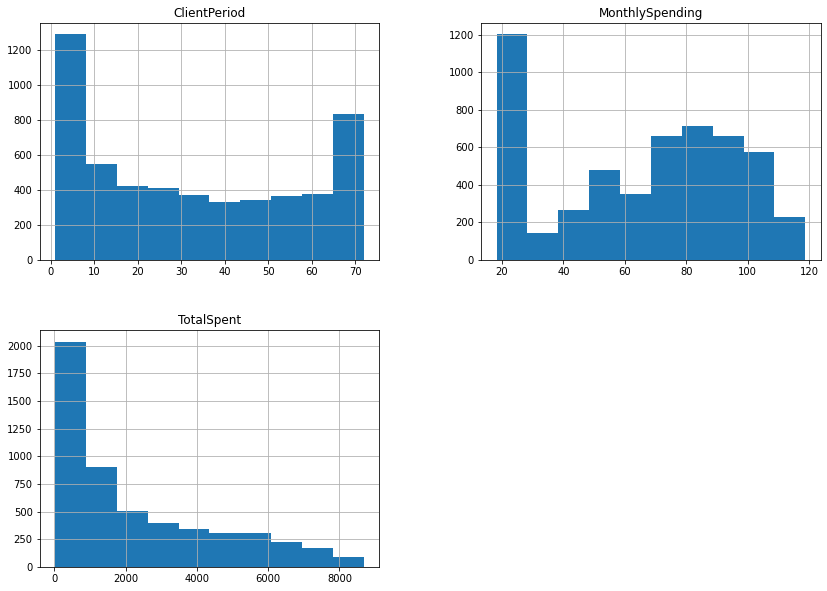

In [157]:
# Для численных признаков построим гистограмму:
data.hist(column=num_cols, figsize=(14, 10))
None

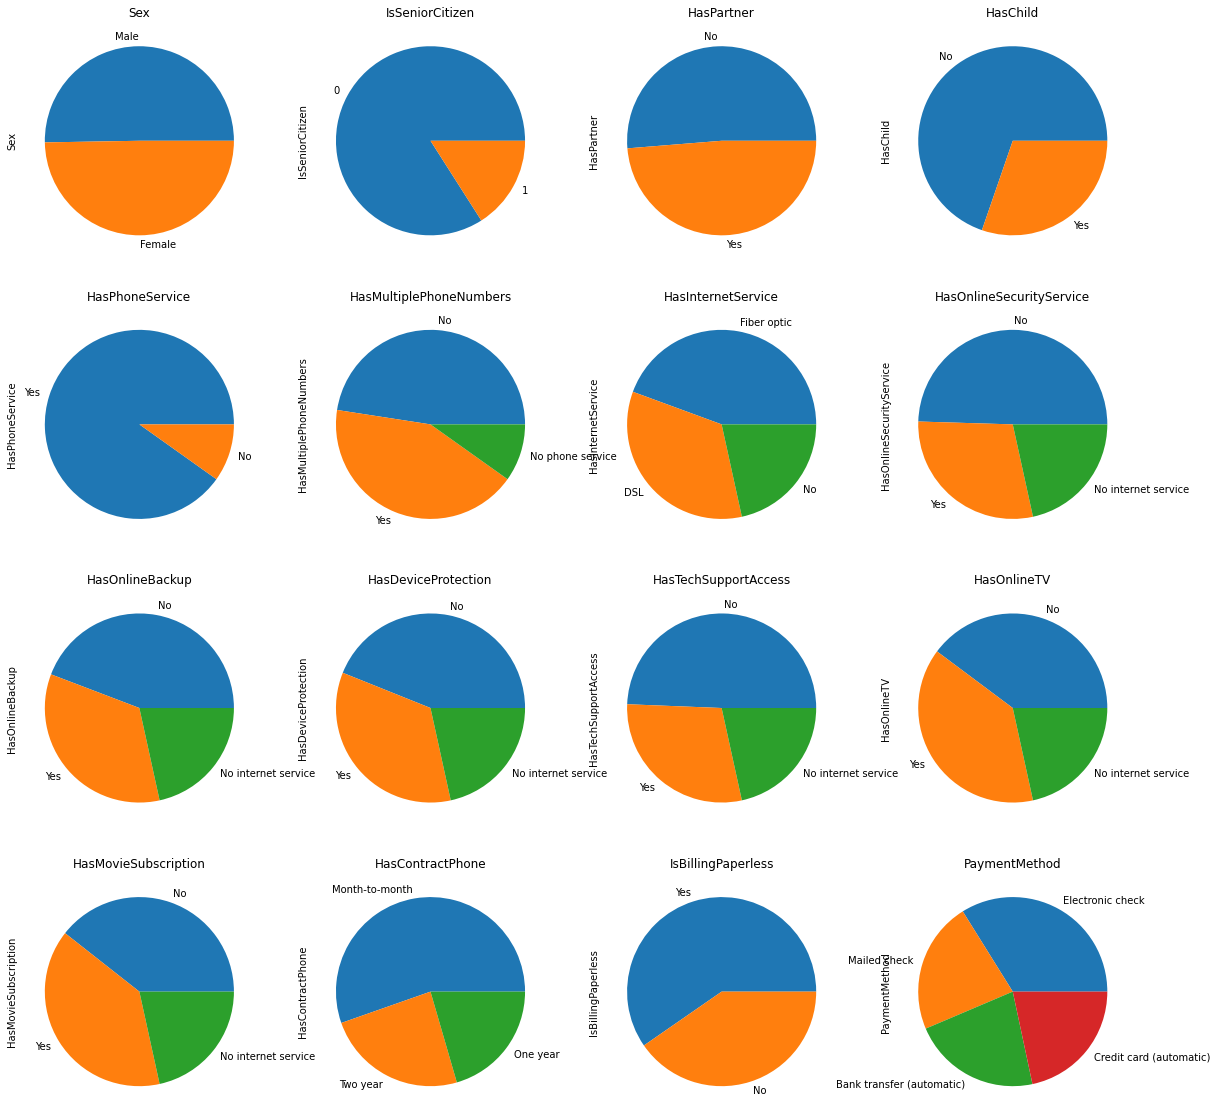

In [158]:
# Для категориальных посчитаем количество значений для каждого признака и построим круговые диаграммы, располагая их на одном графике
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
ax = ax.ravel()
for i, categorical_feature in enumerate(data[cat_cols]):
  data[categorical_feature].value_counts().plot(kind='pie', ax=ax[i]).set_title(categorical_feature)

In [159]:
# Посмотрим на распределение целевой переменной
data[target_col].value_counts()
# Датасет является несбалансированным, но несильно

0    3889
1    1384
Name: Churn, dtype: int64

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [160]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [161]:
# Кодировать бинарные категориальные признаки чрезмерно, поэтому просто превратим их в бинарные признаки
new_data = data.copy()
new_data['Sex'] = np.where(new_data['Sex'] == 'Female', 1, 0)

binary_cat_cols = ['HasPartner',
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless']

for column in binary_cat_cols:
  new_data[column] = np.where(new_data[column] == 'Yes', 1, 0)

In [162]:
# Закодируем оставшиеся категориальные признаки с помощью one hot encoding
nonbinary_cat_cols = [
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'PaymentMethod'                   
]
new_data = pd.get_dummies(new_data, columns=nonbinary_cat_cols)

cat_cols_new = list(new_data.columns)
cat_cols_new.remove(target_col)
for num_col in num_cols:
  cat_cols_new.remove(num_col)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(new_data[num_cols + cat_cols_new], new_data[target_col], test_size=0.2)

In [167]:
cls = make_pipeline(
    StandardScaler(),
    LogisticRegression())

param_grid = [{
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],   
}]

grid_search = GridSearchCV(cls, 
                           param_grid,
                           cv=10,
                           error_score=roc_auc_score,
                           verbose=10)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.799, total=   0.1s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.836, total=   0.1s
[CV] logisticregression__C=100 .......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........... logisticregression__C=100, score=0.801, total=   0.1s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.794, total=   0.1s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.806, total=   0.1s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.794, total=   0.1s
[CV] logisticregression__C=100 .......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s


[CV] ........... logisticregression__C=100, score=0.813, total=   0.1s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.822, total=   0.1s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.810, total=   0.1s
[CV] logisticregression__C=100 .......................................
[CV] ........... logisticregression__C=100, score=0.798, total=   0.1s
[CV] logisticregression__C=10 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s


[CV] ............ logisticregression__C=10, score=0.801, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.834, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.801, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.794, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.808, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.794, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] ............ logisticregression__C=10, score=0.813, total=   0.1s
[CV] logisticregression__C=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.1s finished


GridSearchCV(cv=10, error_score=<function roc_auc_score at 0x7fce2227b950>,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                             

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [168]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'logisticregression__C': 0.1}
0.8079623104546837


{'logisticregression__C': 0.1}

0.8079623104546837

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [145]:
!pip install catboost

     |████████████████████████████████| 66.2MB 46kB/s 


In [146]:
from catboost import CatBoostClassifier

In [169]:
X_train, X_test, y_train, y_test = train_test_split(data[num_cols + cat_cols], data[target_col], test_size=0.2)

In [224]:
boosting_model = CatBoostClassifier(cat_features=cat_cols,
                                    eval_metric='AUC:hints=skip_train~false')

param_grid = {'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8, 10],
        'l2_leaf_reg': [1, 2, 3, 4, 5, 7, 9]}
boosting_model.grid_search(param_grid,
                           X_train, 
                           y_train,
                           cv = 3)


bestTest = 0.8521260859
bestIteration = 450

0:	loss: 0.8521261	best: 0.8521261 (0)	total: 3.26s	remaining: 3m 44s

bestTest = 0.8558479164
bestIteration = 215

1:	loss: 0.8558479	best: 0.8558479 (1)	total: 6.61s	remaining: 3m 44s

bestTest = 0.8526454111
bestIteration = 479

2:	loss: 0.8526454	best: 0.8558479 (1)	total: 9.84s	remaining: 3m 39s

bestTest = 0.8559974191
bestIteration = 110

3:	loss: 0.8559974	best: 0.8559974 (3)	total: 13.2s	remaining: 3m 37s

bestTest = 0.8521969029
bestIteration = 407

4:	loss: 0.8521969	best: 0.8559974 (3)	total: 16.4s	remaining: 3m 33s

bestTest = 0.8527162281
bestIteration = 116

5:	loss: 0.8527162	best: 0.8559974 (3)	total: 19.8s	remaining: 3m 31s

bestTest = 0.8518664233
bestIteration = 398

6:	loss: 0.8518664	best: 0.8559974 (3)	total: 23.1s	remaining: 3m 27s

bestTest = 0.8548013975
bestIteration = 85

7:	loss: 0.8548014	best: 0.8559974 (3)	total: 26.4s	remaining: 3m 24s

bestTest = 0.8525116455
bestIteration = 400

8:	loss: 0.8525116	best: 0.

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

'params': {'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

{'learn': {'AUC': 0.9956862501700994, 'Logloss': 0.15693912532398155}}


# Предсказания

In [231]:
best_model = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC', depth=6, l2_leaf_reg=3, learning_rate=0.1)
best_model.fit(data[num_cols + cat_cols], data[target_col])

0:	total: 14.3ms	remaining: 14.3s
1:	total: 29.9ms	remaining: 14.9s
2:	total: 34.8ms	remaining: 11.6s
3:	total: 42.6ms	remaining: 10.6s
4:	total: 57ms	remaining: 11.3s
5:	total: 68.9ms	remaining: 11.4s
6:	total: 78.5ms	remaining: 11.1s
7:	total: 90.7ms	remaining: 11.2s
8:	total: 104ms	remaining: 11.5s
9:	total: 118ms	remaining: 11.7s
10:	total: 123ms	remaining: 11.1s
11:	total: 137ms	remaining: 11.2s
12:	total: 150ms	remaining: 11.4s
13:	total: 163ms	remaining: 11.5s
14:	total: 176ms	remaining: 11.6s
15:	total: 189ms	remaining: 11.6s
16:	total: 200ms	remaining: 11.6s
17:	total: 212ms	remaining: 11.6s
18:	total: 228ms	remaining: 11.8s
19:	total: 238ms	remaining: 11.7s
20:	total: 252ms	remaining: 11.7s
21:	total: 264ms	remaining: 11.7s
22:	total: 270ms	remaining: 11.5s
23:	total: 284ms	remaining: 11.6s
24:	total: 297ms	remaining: 11.6s
25:	total: 310ms	remaining: 11.6s
26:	total: 322ms	remaining: 11.6s
27:	total: 335ms	remaining: 11.6s
28:	total: 348ms	remaining: 11.7s
29:	total: 362ms	r

In [233]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

Kaggle score (Ksenia Evteeva):

0.85352

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.